# 两类下的朴素贝叶斯分类器

In [1]:
import numpy as np
from scipy.stats import truncnorm
import time
import matplotlib.pyplot as plt

In [2]:
start = time.time()
num=10000#训练集样本数
d1=1000#测试集样本数
d2=0#测试集样本中判断正确个数的初值
d3=20#（0,1）间分为几份
X=[[0.3,0.7],[0.7,0.3]]#两正态分布的中心

In [3]:
#坐标转换
def cf(i):
    c=np.floor(i*d3)+1
    #这里x1/x2都分为20类，否则需分类定义
    return c

In [4]:
#生成训练集
aa=np.empty((num,3))
for i in range(0,int(0.6*num)):
    aa[i][0]=0
    aa[i][1]=cf(np.random.normal(0.3,np.sqrt(0.4)))
    aa[i][2]=cf(np.random.normal(0.7,np.sqrt(0.4)))

for i in range(int(0.6*num),num):
    aa[i][0]=1
    aa[i][1]=cf(np.random.normal(0.7,np.sqrt(0.4)))
    aa[i][2]=cf(np.random.normal(0.3,np.sqrt(0.4)))

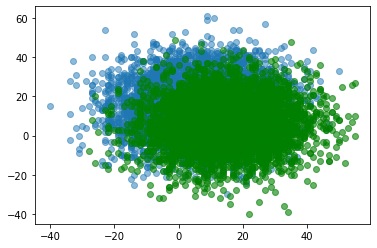

In [5]:
#测试集的图像
fig = plt.figure()
ax = plt.subplot()
ax.scatter(aa[:int(0.6*num),1],aa[:int(0.6*num),2],  alpha=0.5)
ax.scatter(aa[int(0.6*num):,1], aa[int(0.6*num):,2],  c='green', alpha=0.6)  
plt.show()

In [6]:
#方法一
#截取0到1的压缩训练集数据，并将数据到这400个格子中
'''
cc=np.zeros((d3,d3,2),int)
for i in range(0,num):
    for j in  range(d3):
        for k in range(d3):
            if aa[i][1]==j and aa[i][2]==k:
                if aa[i][0]==0:
                    cc[j-1][k-1][1]+=1
                else:
                    cc[j-1][k-1][0]+=1
'''

'\ncc=np.zeros((d3,d3,2),int)\nfor i in range(0,num):\n    for j in  range(d3):\n        for k in range(d3):\n            if aa[i][1]==j and aa[i][2]==k:\n                if aa[i][0]==0:\n                    cc[j-1][k-1][1]+=1\n                else:\n                    cc[j-1][k-1][0]+=1\n'

In [7]:
#方法二
#截取0到1的压缩训练集数据，并将数据到这400个格子中
#bb[j][k][0]表示第j行第k列中类0的数目，bb[j][k][1表示第j行第k列中类1的数目
bb=np.empty((d3,d3,2))
for i in range(num):
    if aa[i][1]>0 and aa[i][1]<=d3 and aa[i][2]>0 and aa[i][2]<=d3 :
        j=int(aa[i][1])-1
        k=int(aa[i][2])-1
        if aa[i][0]==0:
            bb[j][k][0]+=1
        else:
            bb[j][k][1]+=1

In [ ]:
bb[0][0][0]>=bb[0][0][1]

In [ ]:
dd=np.empty((d3,d3))
k=0
for i in range(d3):
    for j in range(d3): 
        if bb[i][j][0]>=bb[i][j][1]:
            dd[i][j]=0
            k+=1
        else:
            dd[i][j]=1
    
    

In [ ]:
y0=0
#训练集中y=0的数目
y1=0
#训练集y=1的数目
for i in range(d3):
    for j in range(d3):
        y0=y0+bb[i][j][0]

for i in range(d3):
    for j in range(d3):
        y1=y1+bb[i][j][1]

In [ ]:
#c=[0/1,x1类,x2类]
#判别函数
def judge(c):
    n0=0#y=0下X1=c[1]时列的计数器
    m0=0#y=0下X2=c[2]时行的计数器
    n1=0#y=1下X1=c[1]时列的计数器
    m1=0#y=1下X2=c[2]时行的计数器

    for i in range(d3):
        n0=n0+bb[c[1]-1][i][0]
        m0=m0+bb[i][c[2]-1][0]
  
    a0=(n0+1)/(y0+d3)
    b0=(m0+1)/(y0+d3)
    p0=a0*b0
    
    for i in range(d3):
        n1=n1+bb[c[1]-1][i][1]
        m1=m1+bb[i][c[2]-1][1]
  
    a1=(n1+1)/(y1+d3)
    b1=(m1+1)/(y1+d3)
    p1=a1*b1


    if p0<p1:
        return 1
    else:
        return 0

In [ ]:
def I(c):
    n=np.random.uniform()
    if c<=n:
        return 0
    else:
        return 1

In [ ]:
#生成测试集
cc=np.empty((d1,3),int)
for i in range(d1):
    #cc[i][0]=i+1#cc[i]的序号
    cc[i][0]=I(0.4)#cc[i]的真实类
    a=int(cc[i][0])
    cc[i][1]=cf(np.random.normal(X[a][0],np.sqrt(0.4)))
    cc[i][2]=cf(np.random.normal(X[a][1],np.sqrt(0.4)))

In [ ]:
#裁剪测试集
dd=[]
for i in range(d1):
    if cc[i][1]>0 and cc[i][1]<=d3 and cc[i][2]>0 and cc[i][2]<=d3:
        dd.append(cc[i])
dd=np.array(dd,int)

In [ ]:
n=0#测试集中正确判定的数目
for i in range(len(dd)):
    if judge(dd[i])==dd[i][0]:
        n+=1

In [ ]:
n/len(dd)
#正确率

In [ ]:
end = time.time()
running_time = end-start
print('time cost : %.5f sec' %running_time)